In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns # data visualization

import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/higher-education-predictors-of-student-retention/dataset.csv


In [5]:
student_data = pd.read_csv('/kaggle/input/higher-education-predictors-of-student-retention/dataset.csv')

In [6]:
student_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [7]:
student_data.shape

(4424, 35)

In [8]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [9]:
student_data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4419    False
4420    False
4421    False
4422    False
4423    False
Length: 4424, dtype: bool

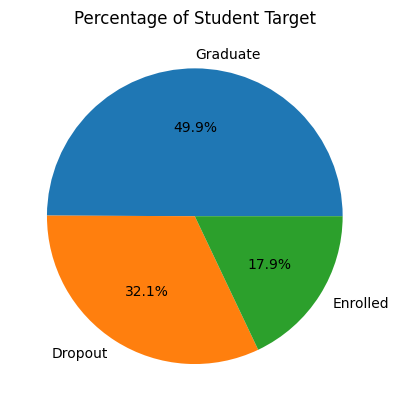

In [10]:
student_target = student_data['Target'].value_counts()

plt.pie(student_target, labels=student_target.index, autopct='%1.1f%%')
plt.title('Percentage of Student Target')
plt.show()

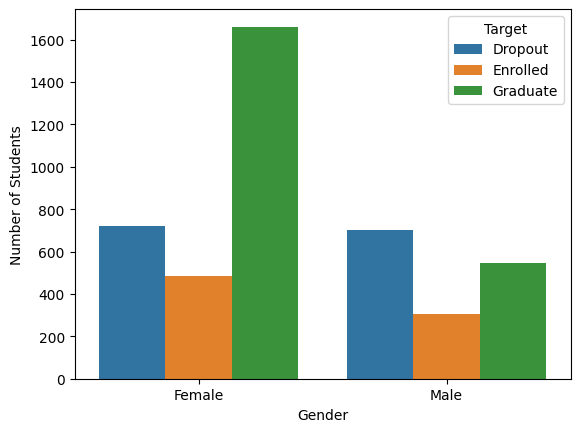

In [11]:
sns.countplot(data=student_data, x='Gender', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['Female','Male'])
plt.ylabel('Number of Students')
plt.show()

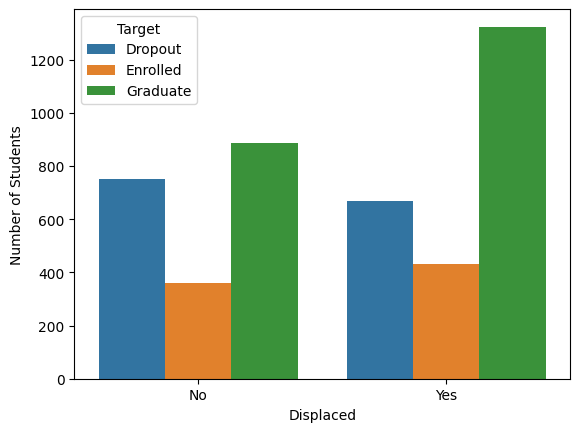

In [14]:
sns.countplot(data=student_data, x='Displaced', hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.ylabel('Number of Students')
plt.show()

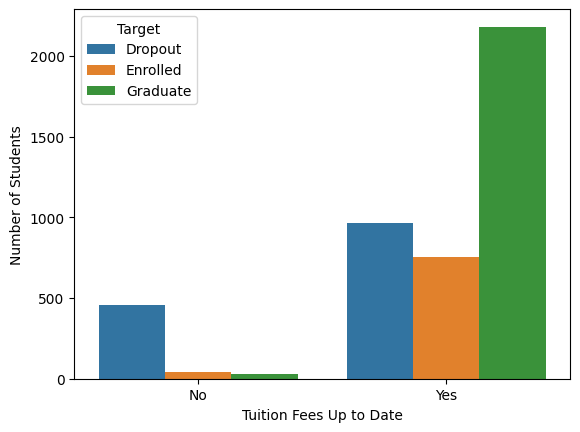

In [15]:
sns.countplot(data=student_data, x="Tuition fees up to date", hue='Target', hue_order=['Dropout', 'Enrolled', 'Graduate'])

plt.xticks(ticks=[0,1], labels=['No','Yes'])
plt.xlabel('Tuition Fees Up to Date')
plt.ylabel('Number of Students')
plt.show()